In [9]:
from scipy.stats import poisson
from scipy import stats
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

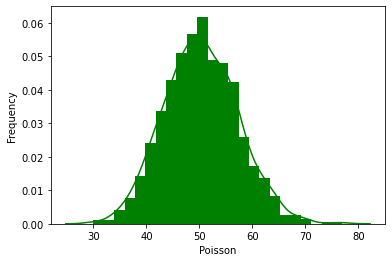

In [2]:

data_binom = poisson.rvs(mu=50, size=1000)
ax = sb.distplot(data_binom,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

In [3]:
alpha = 0.5
std = stats.tstd(data_binom)

mu = np.mean(data_binom)
N = len(data_binom)

sigma = 1.96
print(mu - sigma*(std/N**0.5) - mu + sigma*(std/N**0.5))

-2.609024107869118e-15


In [4]:
stds = []
size = 10000
n_iter = 1000

for _ in range(n_iter):
    samples = poisson.rvs(mu=50, size=size)
    std = np.std(samples)
    stds.append(std)

<AxesSubplot:ylabel='Count'>

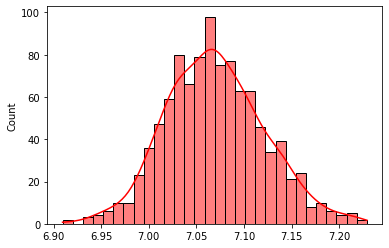

In [5]:
sb.histplot(stds, bins=30, kde=True, color='red', alpha=0.5)

In [6]:
alpha = 0.05
ci = np.quantile(stds, q=[alpha / 2, 1 - alpha / 2])
ci

array([6.97563705, 7.17768653])

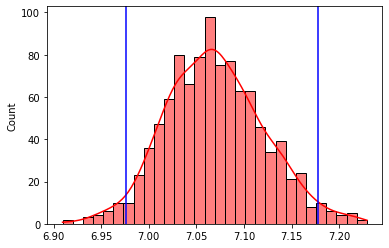

In [10]:
sb.histplot(stds, bins=30, kde=True, color='red', alpha=0.5)
plt.axvline(x=ci[0], color='blue')
plt.axvline(x=ci[1], color='blue')

In [27]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

def my_statisctic(X, y):
    idx = np.arange(len(y))

    train_idx = np.random.choice(idx, size=idx.shape[0], replace=True)
    valid_idx = np.setdiff1d(idx, train_idx, assume_unique=False)

    boot_train_X, boot_train_y = X[train_idx], y[train_idx]
    boot_valid_X, boot_valid_y = X[valid_idx], y[valid_idx]
    
    boot_predict = Ridge().fit(boot_train_X, boot_train_y).predict(boot_valid_X)
    rmse = mean_squared_error(boot_valid_y, boot_predict) 
    
    return rmse

In [31]:
n_iter = 1000
stats = []

for _ in range(n_iter):
    stats.append(my_statisctic(X.values, y))

<AxesSubplot:ylabel='Count'>

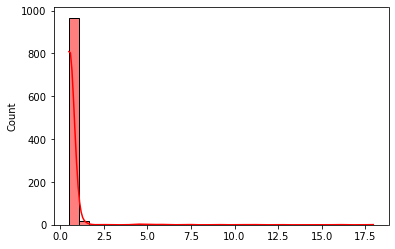

In [32]:
sb.histplot(stats, bins=30, kde=True, color='red', alpha=0.5)

In [33]:
np.quantile(stats, [0.025, 0.975])

array([0.50827702, 1.18901889])